In [1]:
import matplotlib.pyplot as plt

from saveload import load_model
import torch.nn.functional as F



from common_segmentation import calculate_iou, get_palette
from common_segmentation import ClothingCoParsing



import albumentations as alb
from albumentations.pytorch.transforms import ToTensorV2
from common_segmentation import add_mask, make_colored_mask

import torch

In [2]:
model = load_model("../checkpoint_aug_dice/model_2000.pth")

In [3]:
dataset = ClothingCoParsing("../../arch/",
augs = alb.Compose([
        alb.Resize(768, 768), 
        alb.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
        ])
)
dataset2 = ClothingCoParsing("../../arch/",
        augs = alb.Compose([
        alb.Resize(768, 768), 
        ToTensorV2()
        ]))

In [4]:
index = 100
image, orig_mask = dataset2[index]
image = image.permute(1, 2, 0)
x, y = dataset[index]
with torch.no_grad():
    p = model(x.unsqueeze(0).cuda())
    p = F.upsample(p, (768, 768), mode="bilinear").squeeze(0).permute(1, 2, 0).cpu().numpy()
    p = p.argmax(axis=2)

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [19]:
me = cv2.imread("../../images/IMG_20220601_182822.jpg")
me = cv2.cvtColor(me, cv2.COLOR_BGR2RGB)
aug = alb.Compose([
        alb.Resize(768, 768), 
        alb.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
        ])
me_x = aug(image=me)["image"]

with torch.no_grad():
    p = model(me_x.unsqueeze(0).cuda())
    p = F.upsample(p, (768, 768), mode="bilinear").squeeze(0).permute(1, 2, 0).cpu().numpy()
    p = p.argmax(axis=2)

In [5]:
import cv2
image = cv2.imread("../../arch/jpeg_images/IMAGES/img_0006.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (768, 768))

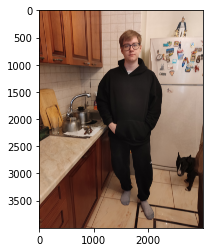

In [20]:
plt.imshow(me)

In [23]:
def make_colored_mask(mask):
    import numpy as np
    colored_mask = np.zeros(list(mask.shape) + [3], dtype=np.uint8)
    colored_mask[mask == 1] = [255, 0, 0]
    colored_mask[mask == 2] = [0, 200, 0]
    colored_mask[mask == 3] = [0, 0, 200]
    return colored_mask

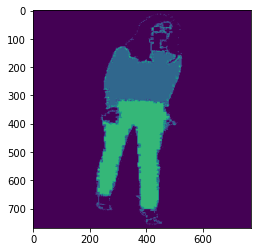

In [24]:
plt.imshow(orig_mask)

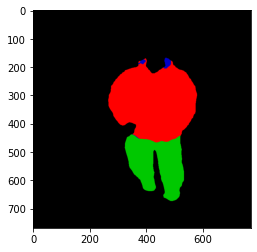

In [25]:
plt.imshow(make_colored_mask(p))

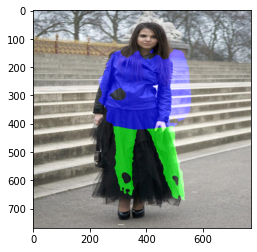

In [17]:
plt.imshow(add_mask(image, make_colored_mask(p)))

In [11]:
model = model.eval()

In [12]:
x, y = dataset[0]

In [28]:

with torch.no_grad():
    p = model(x.unsqueeze(0).cuda())
    p = F.upsample(p, (768, 768), mode="bilinear").squeeze(0).permute(1, 2, 0).cpu().numpy()
    p = p.argmax(axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


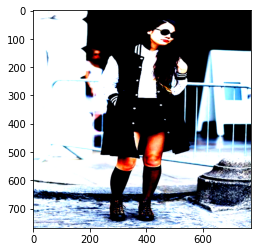

In [34]:
plt.imshow(x.permute(1, 2, 0))

In [3]:
from time import time
from argparse import ArgumentParser
from pathlib import Path

import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

from saveload import load_model
from data import Normalize_image
from common_segmentation import calculate_iou, get_palette
import matplotlib.pyplot as plt


SyntaxError: invalid syntax (dataset.py, line 15)

In [4]:
import torch
import torch.nn as nn
import numpy as np

images = np.load("../image.np.npy")
labels = np.load("../label.np.npy")
x = torch.from_numpy(images).cuda()[:8]
y = torch.from_numpy(labels).cuda()[:8]

In [5]:
with torch.no_grad():
    p = model(x)
    print(p.shape)
    p = nn.functional.upsample(p, x.shape[2:], mode="bilinear")
    print(p.shape)

torch.Size([8, 4, 96, 96])
torch.Size([8, 4, 768, 768])


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


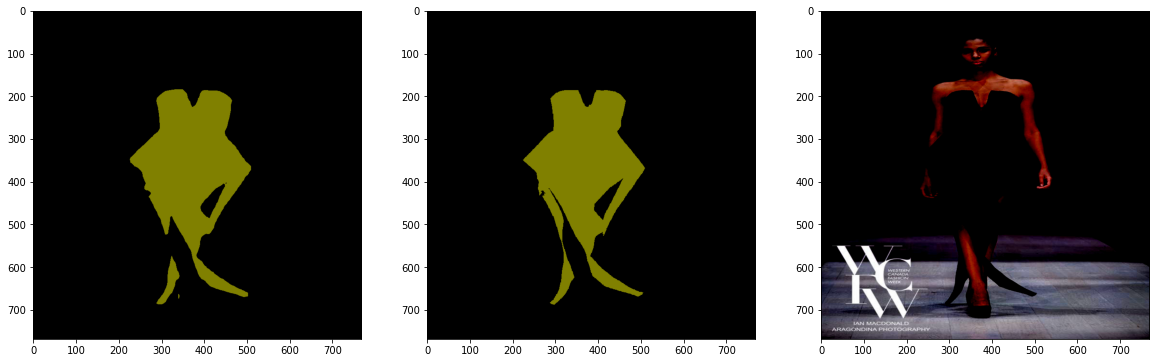

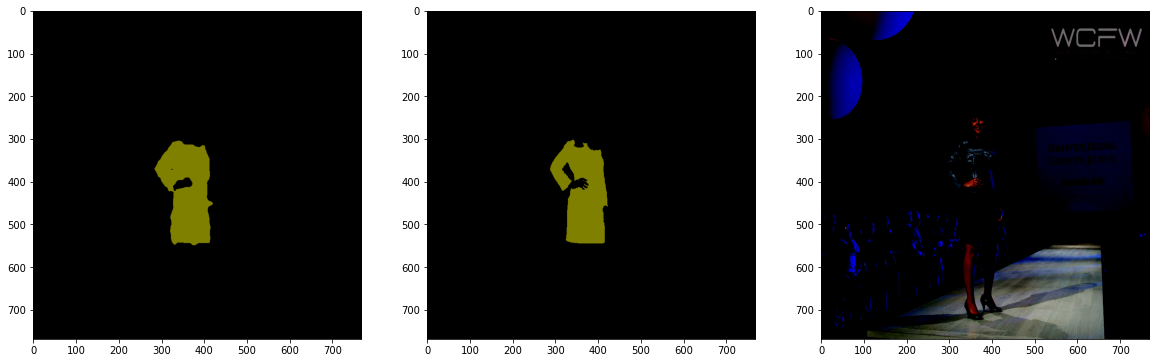

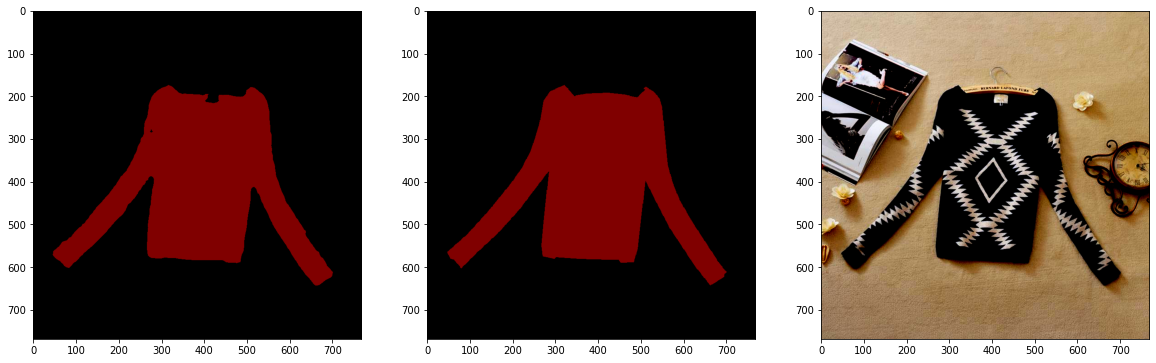

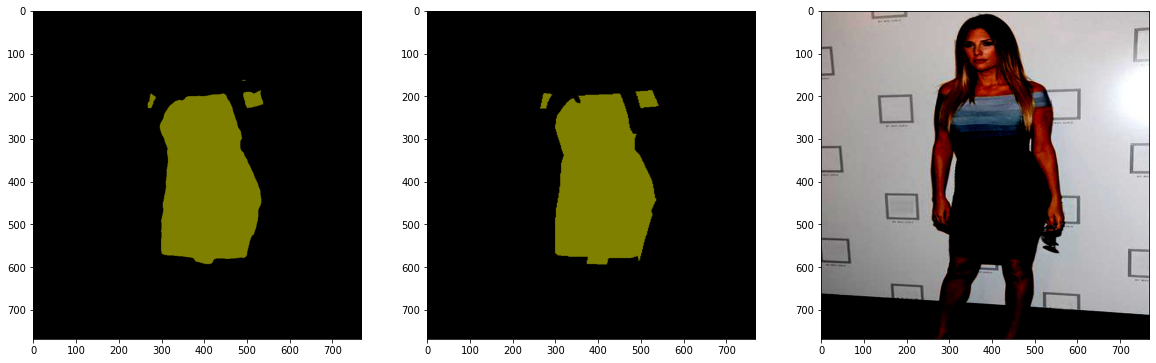

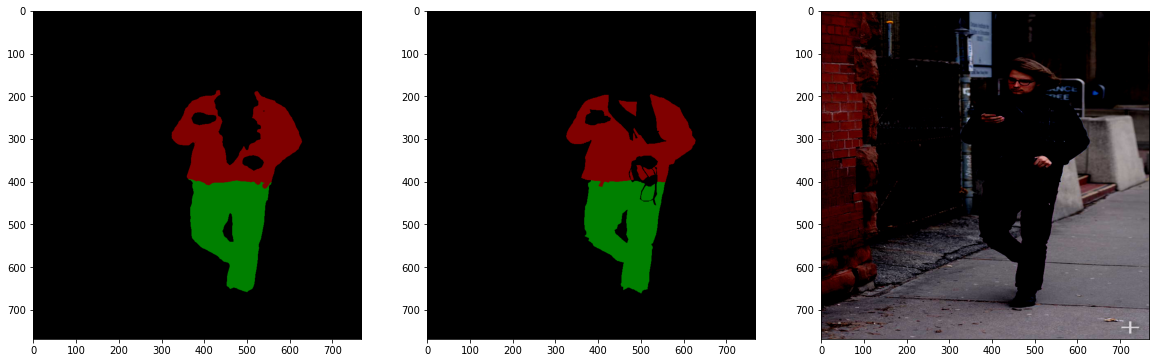

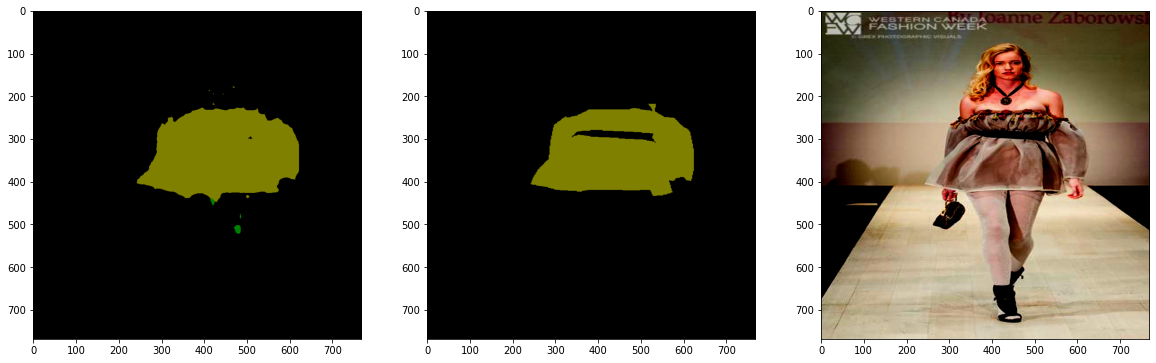

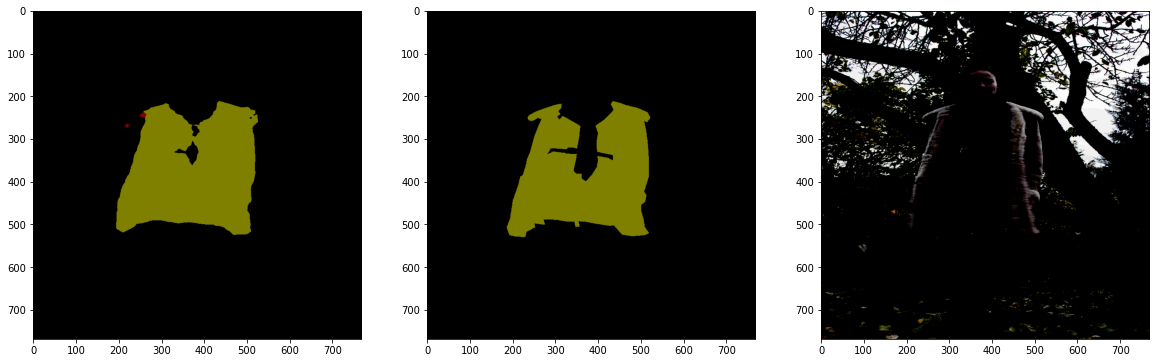

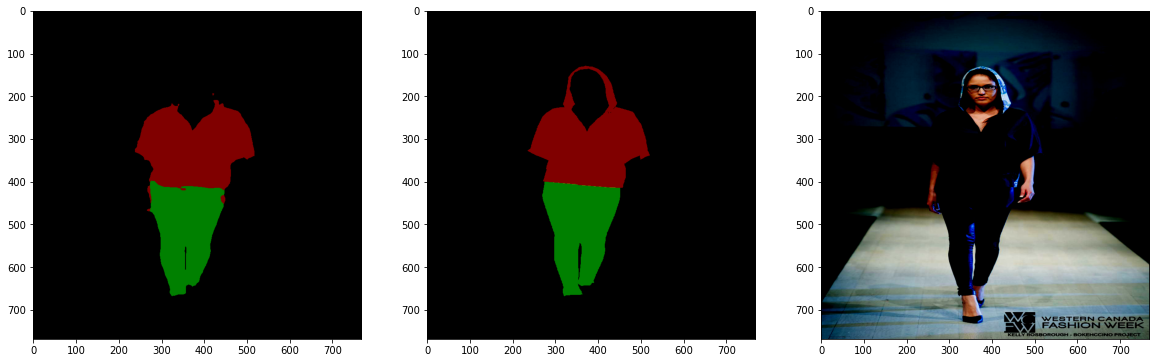

In [7]:
for i in range(8):
    n = i
    img = p[n].argmax(0).cpu().numpy()
    lbl = y[n].cpu().numpy()
    img = Image.fromarray(img.astype("uint8"), mode="L")
    lbl = Image.fromarray(lbl.astype("uint8"), mode="L")
    img.putpalette(palette)
    lbl.putpalette(palette)
    fig, ax = plt.subplots(1, 3, figsize=(20, 20))
    ax[0].imshow(img)
    ax[1].imshow(lbl)
    ax[2].imshow(images[i].transpose(1, 2, 0))

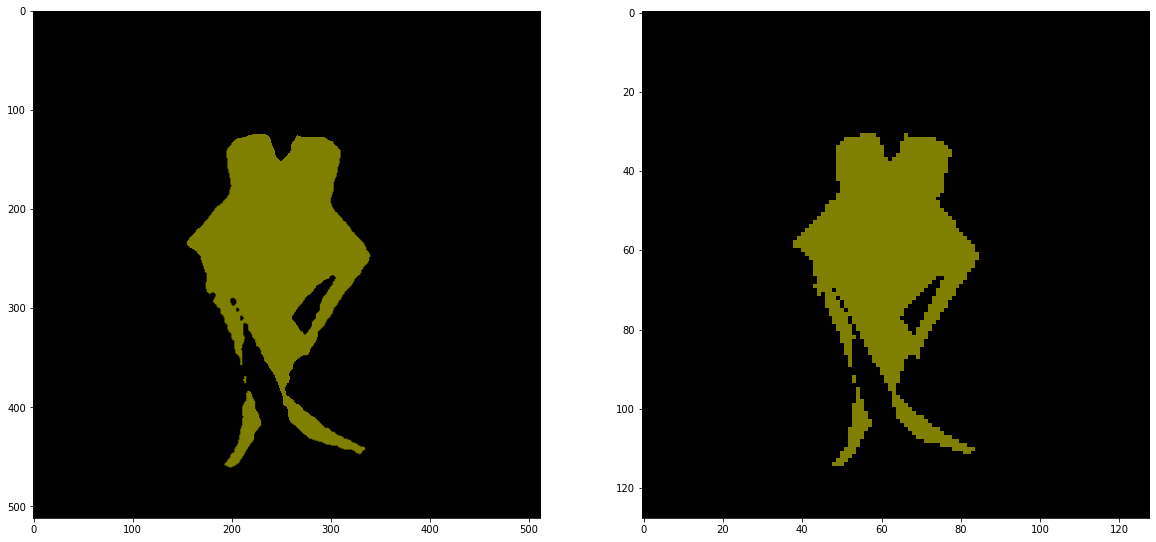

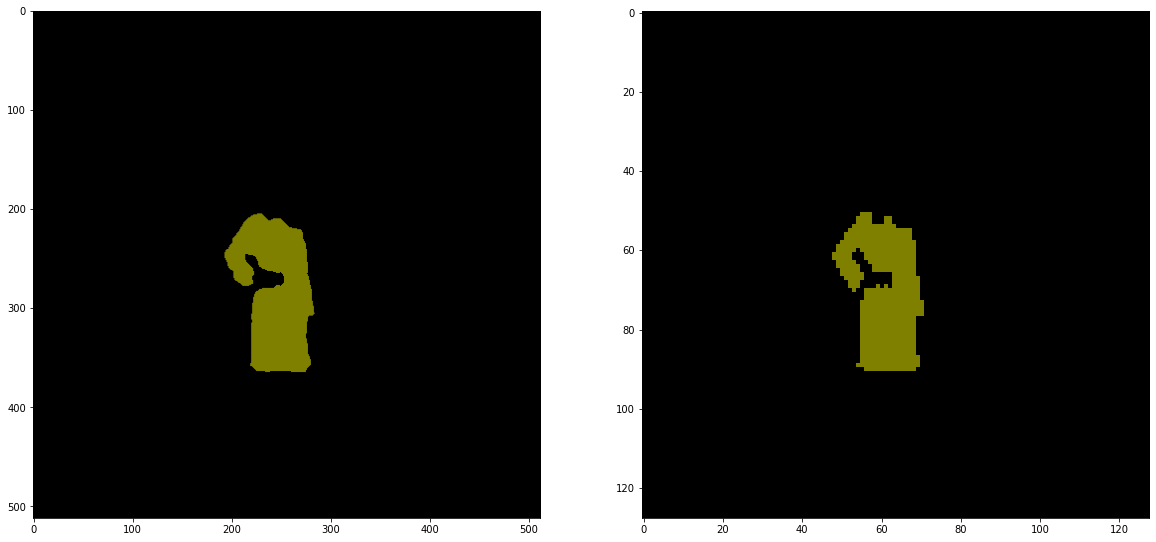

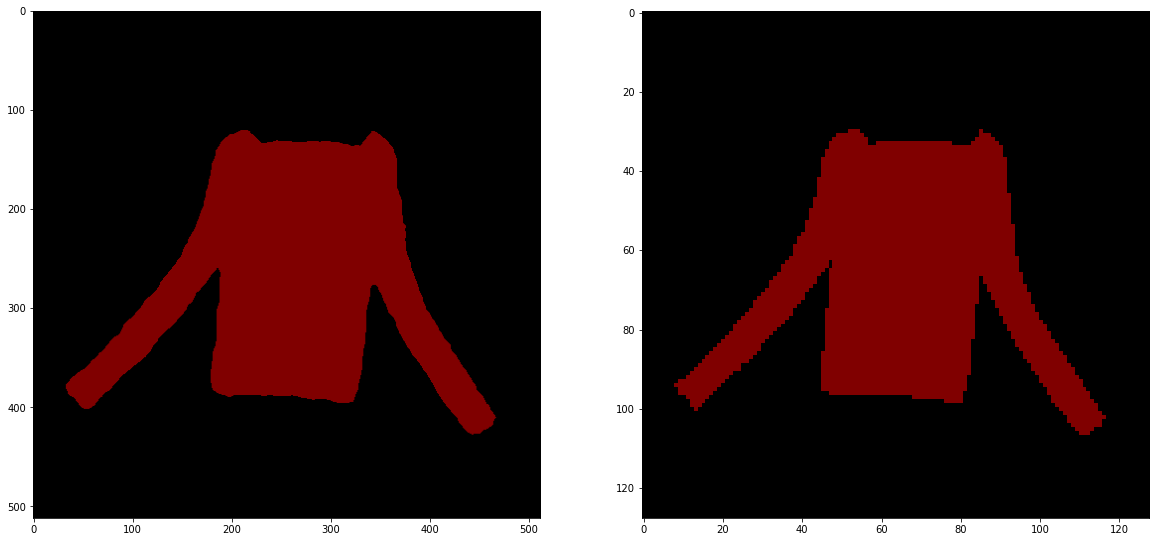

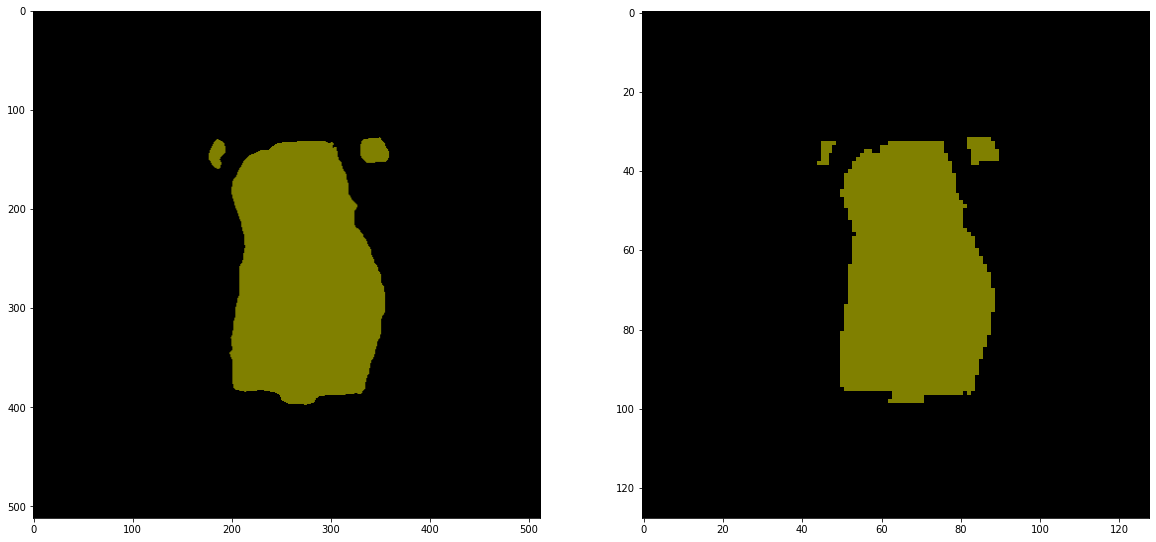

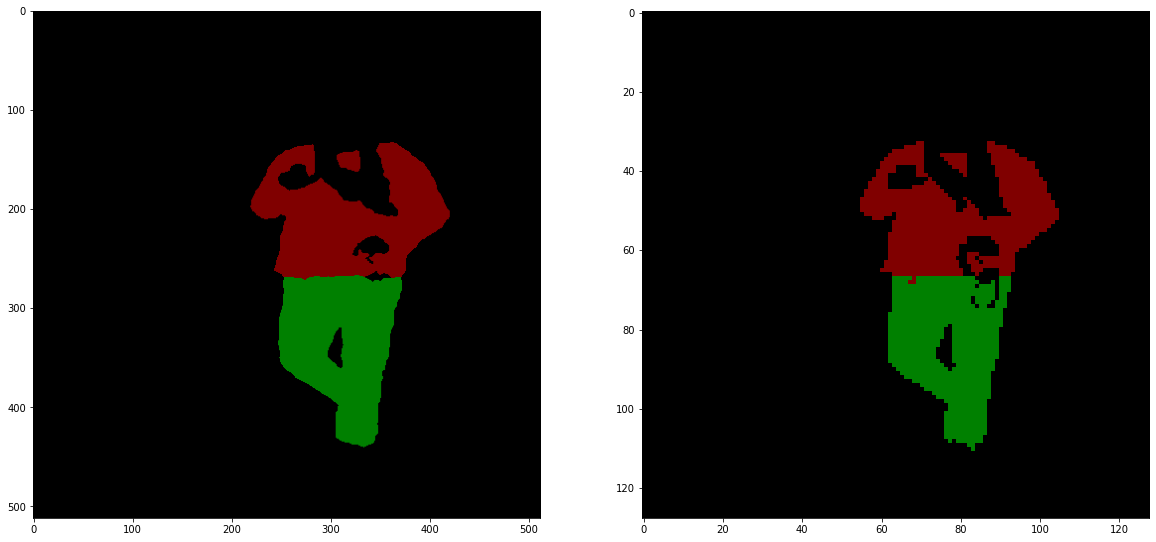

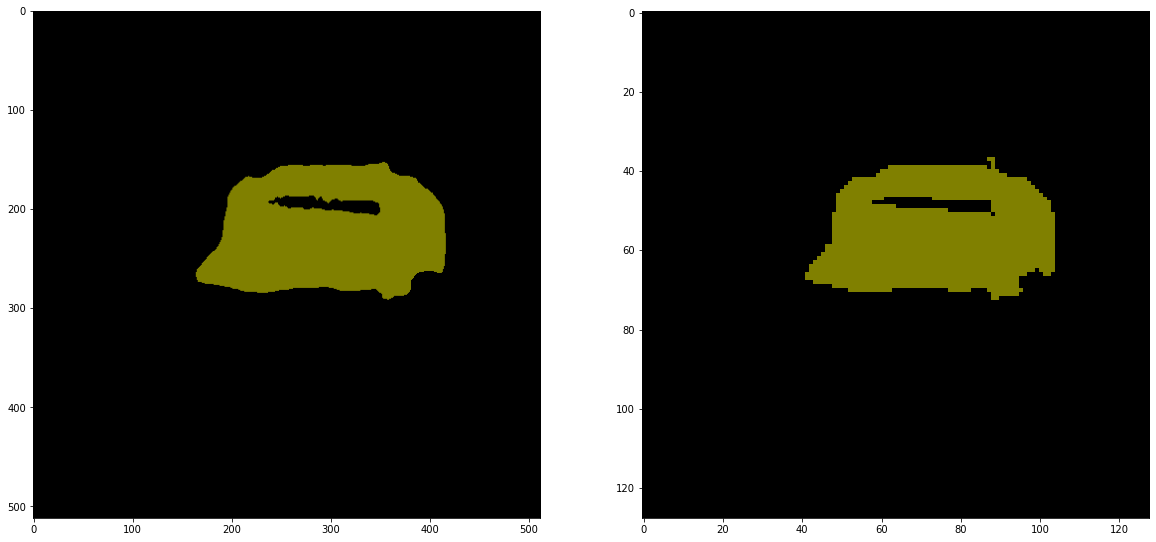

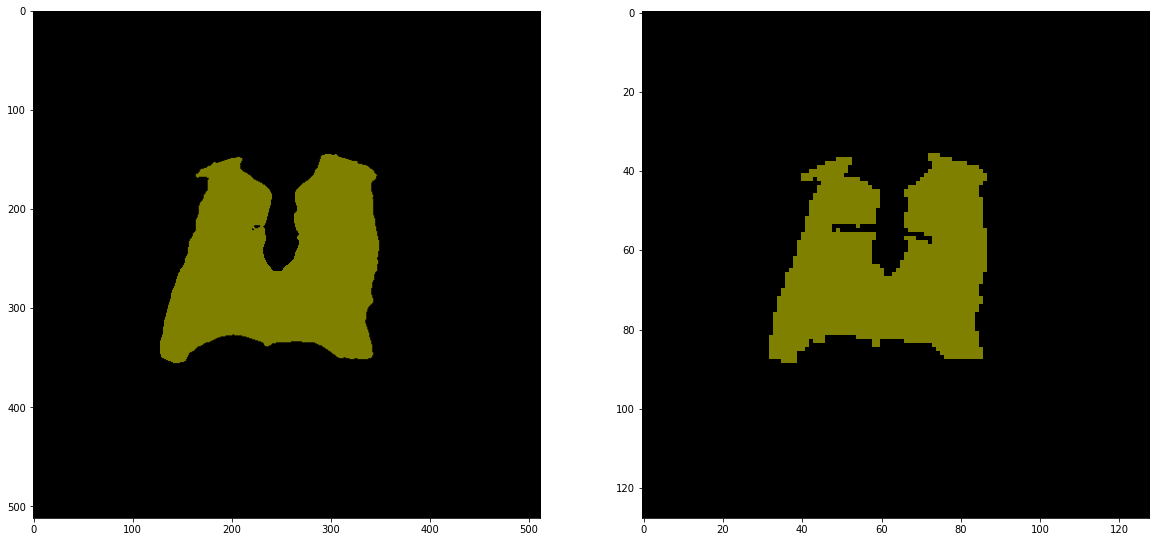

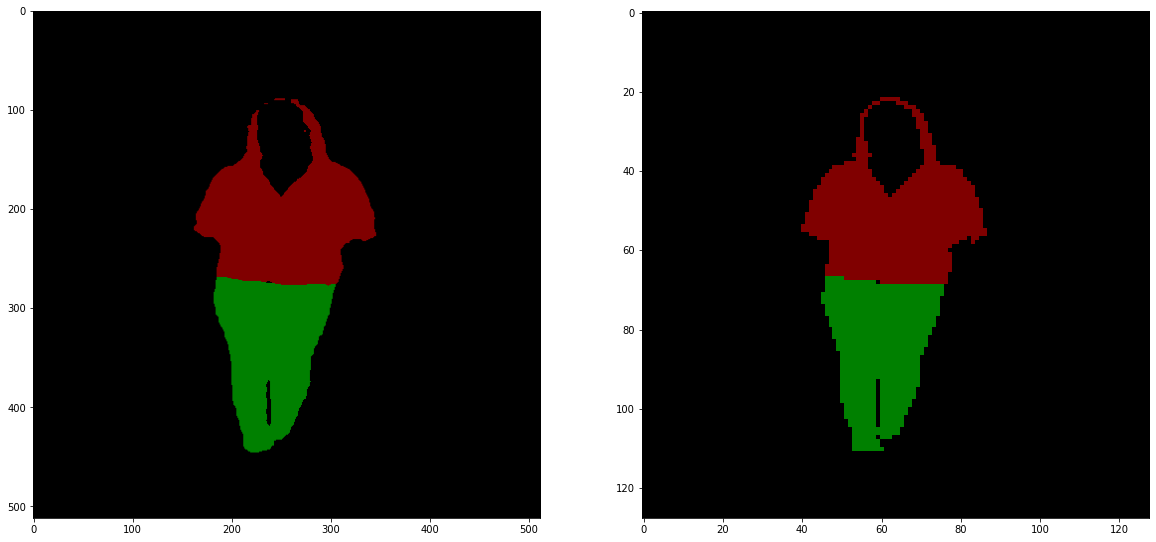

In [11]:
for i in range(8):
    n = i
    img = p[n].argmax(0).cpu().numpy()
    lbl = y[n].cpu().numpy()
    img = Image.fromarray(img.astype("uint8"), mode="L")
    lbl = Image.fromarray(lbl.astype("uint8"), mode="L")
    img.putpalette(palette)
    lbl.putpalette(palette)
    fig, ax = plt.subplots(1, 2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[1].imshow(lbl)

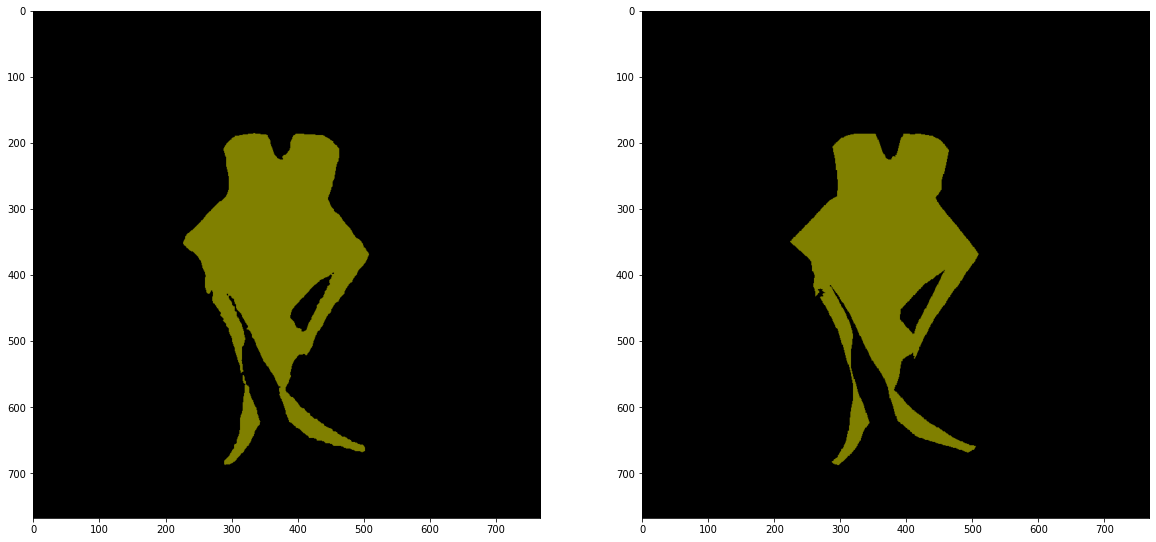

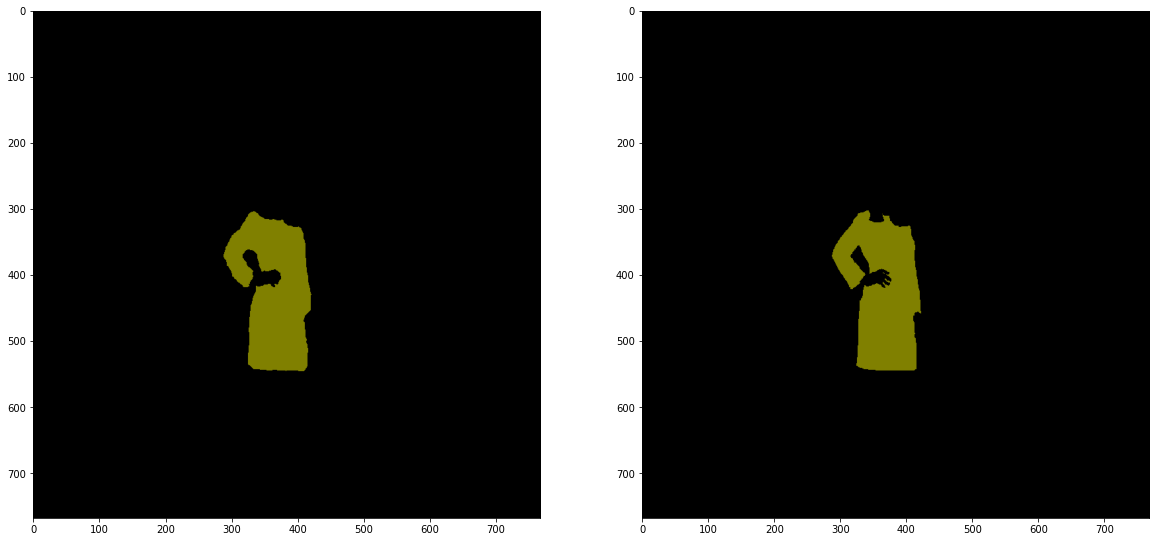

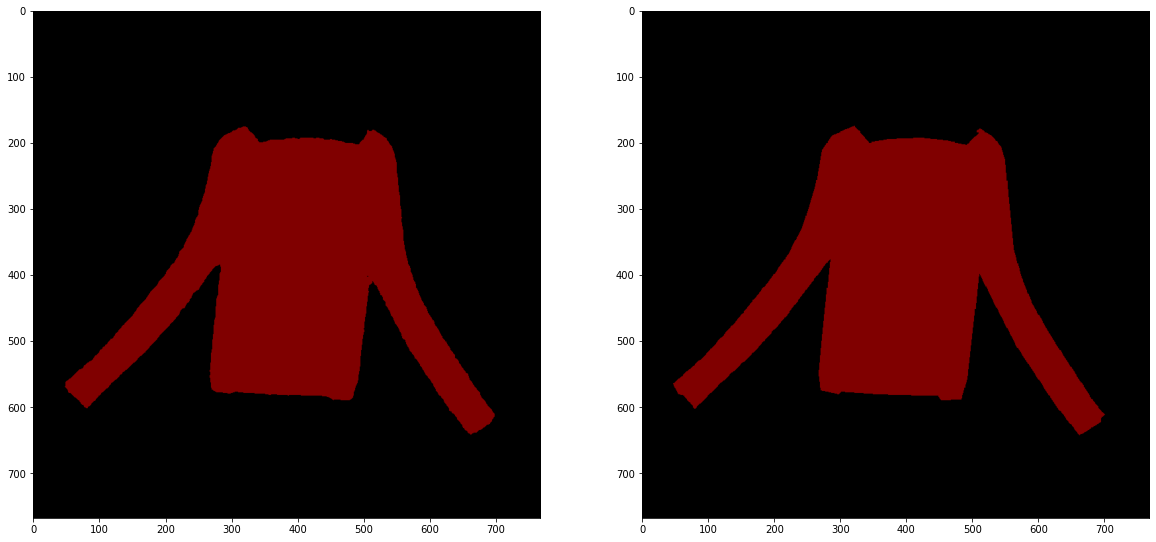

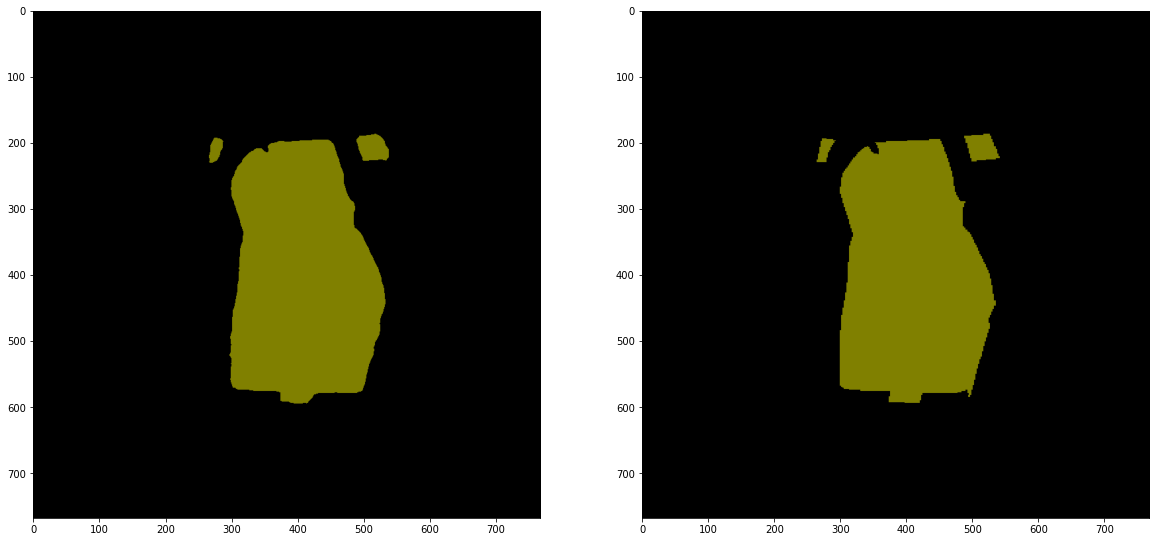

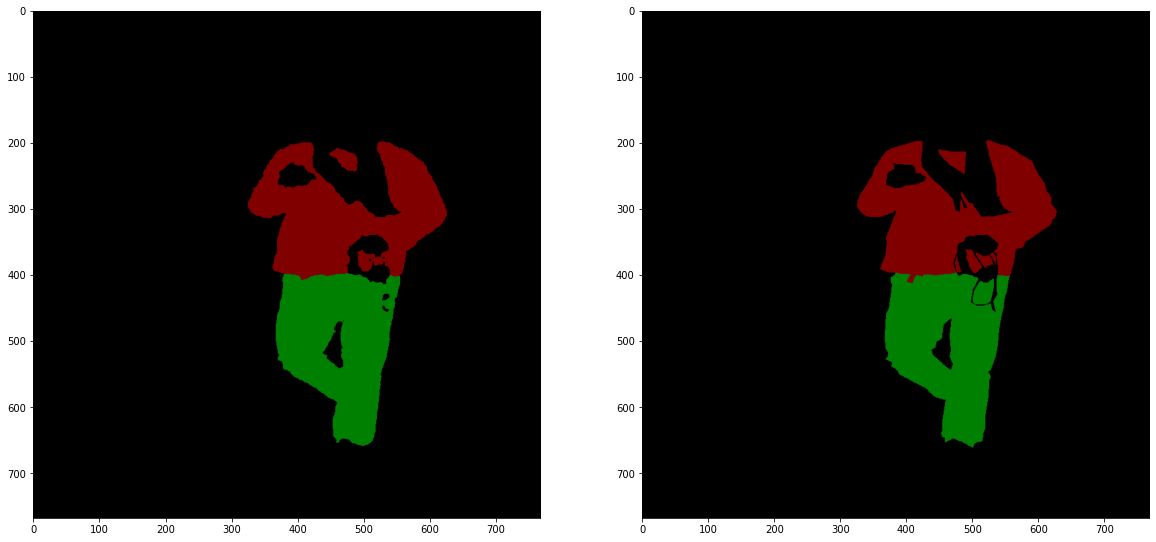

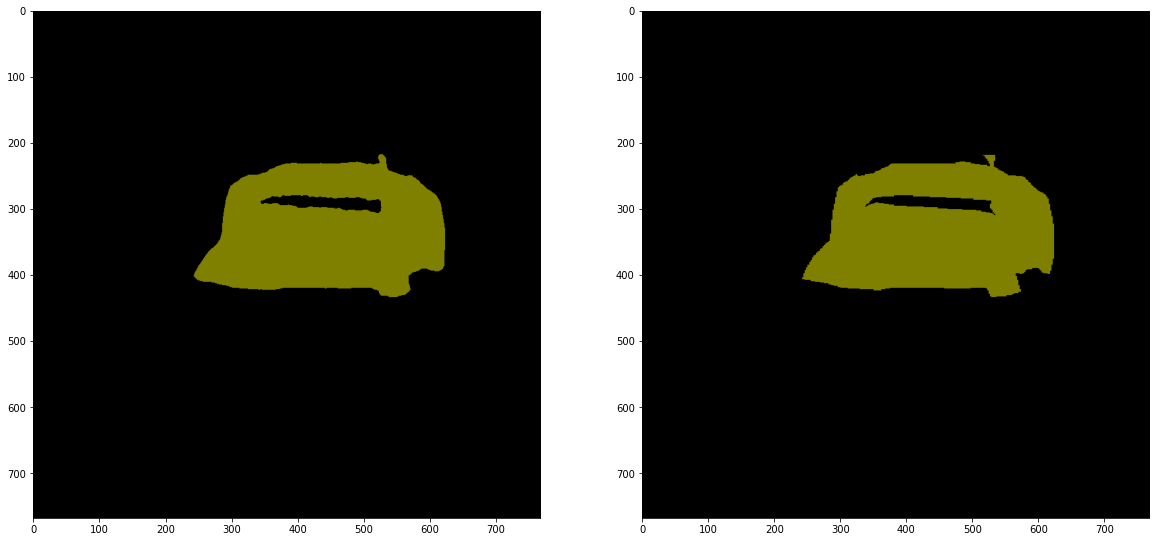

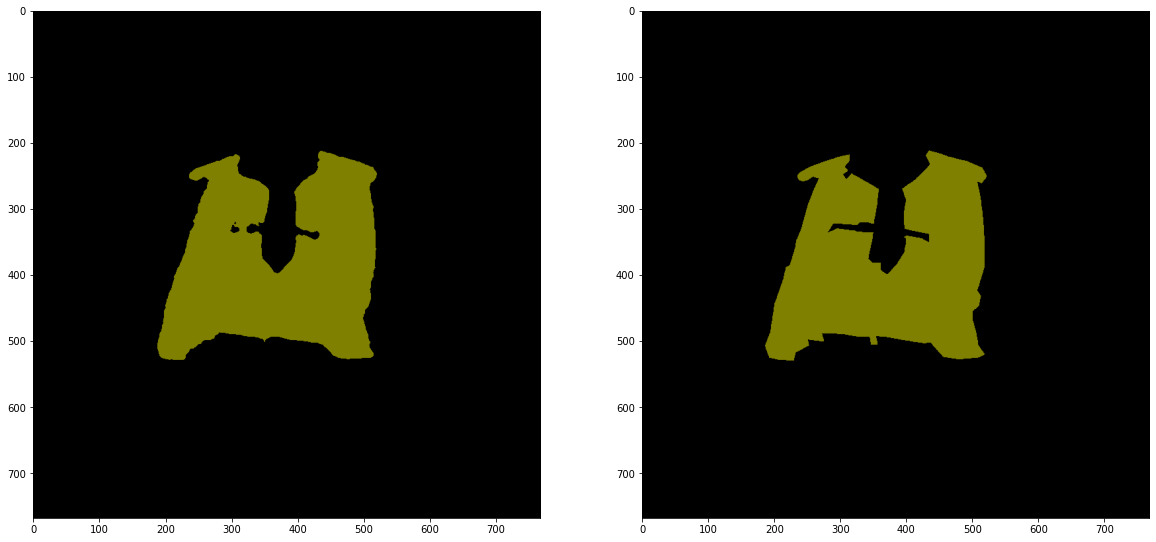

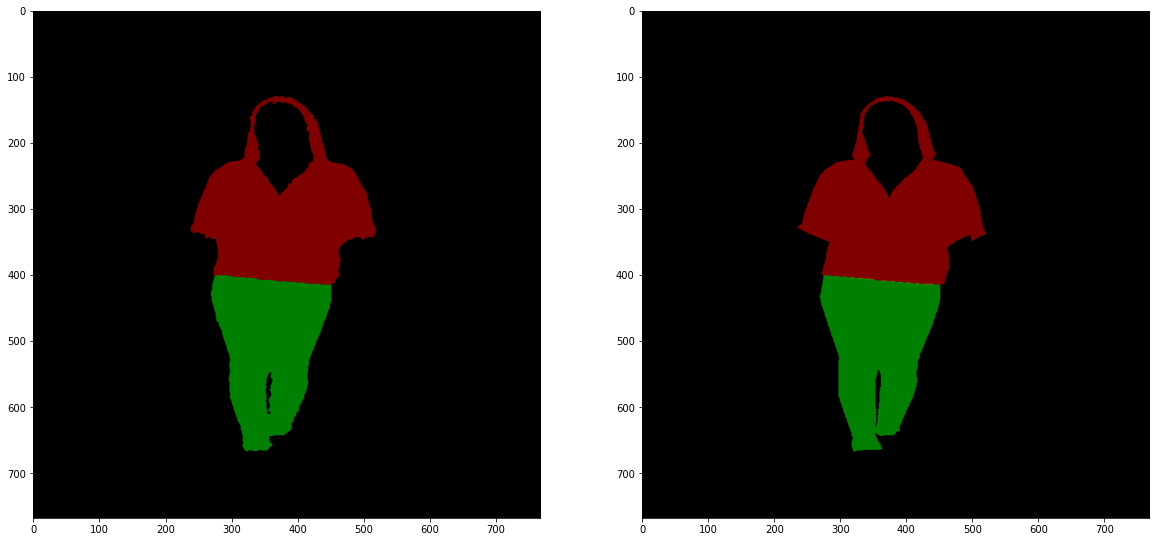

In [20]:
for i in range(8):
    n = i
    img = p[n].argmax(0).cpu().numpy()
    lbl = y[n].cpu().numpy()
    img = Image.fromarray(img.astype("uint8"), mode="L")
    lbl = Image.fromarray(lbl.astype("uint8"), mode="L")
    img.putpalette(palette)
    lbl.putpalette(palette)
    fig, ax = plt.subplots(1, 2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[1].imshow(lbl)

In [5]:
# n = 0
# img = p[n].argmax(0).cpu().numpy()
# lbl = y[n].cpu().numpy()
# img = Image.fromarray(img.astype("uint8"), mode="L")
# lbl = Image.fromarray(lbl.astype("uint8"), mode="L")
# img.putpalette(palette)
# lbl.putpalette(palette)
# fig, ax = plt.subplots(1, 2)
# ax[0].imshow(img)
# ax[1].imshow(lbl)

In [6]:
# p = p[n].argmax(dim=0)
# p = p.cpu().numpy()
# output_img = Image.fromarray(p.astype('uint8'), mode='L')
# # output_img = output_img.resize(original_size, Image.BICUBIC)
# output_img.putpalette(palette)
# fig, axs = plt.subplots(1, 2, figsize=(20, 20))

In [10]:
c = nn.CrossEntropyLoss()
c(p[1].unsqueeze(0), y[1].unsqueeze(0))

tensor(0.0354, device='cuda:0')

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [18]:
import torch
import torch.nn as nn
import numpy as np


c = nn.CrossEntropyLoss()
images = np.load("../image.np.npy")
labels = np.load("../label.np.npy")
x = torch.from_numpy(images).cuda()[:8]
y = torch.from_numpy(labels).cuda()[:8]
with torch.no_grad():
    p = model(x)
    p = nn.functional.upsample(p, x.shape[2:], mode="bilinear")
    loss = c(p, y)
    print(loss)

tensor(0.0416, device='cuda:0')


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [21]:
l = p[0].cpu().numpy()

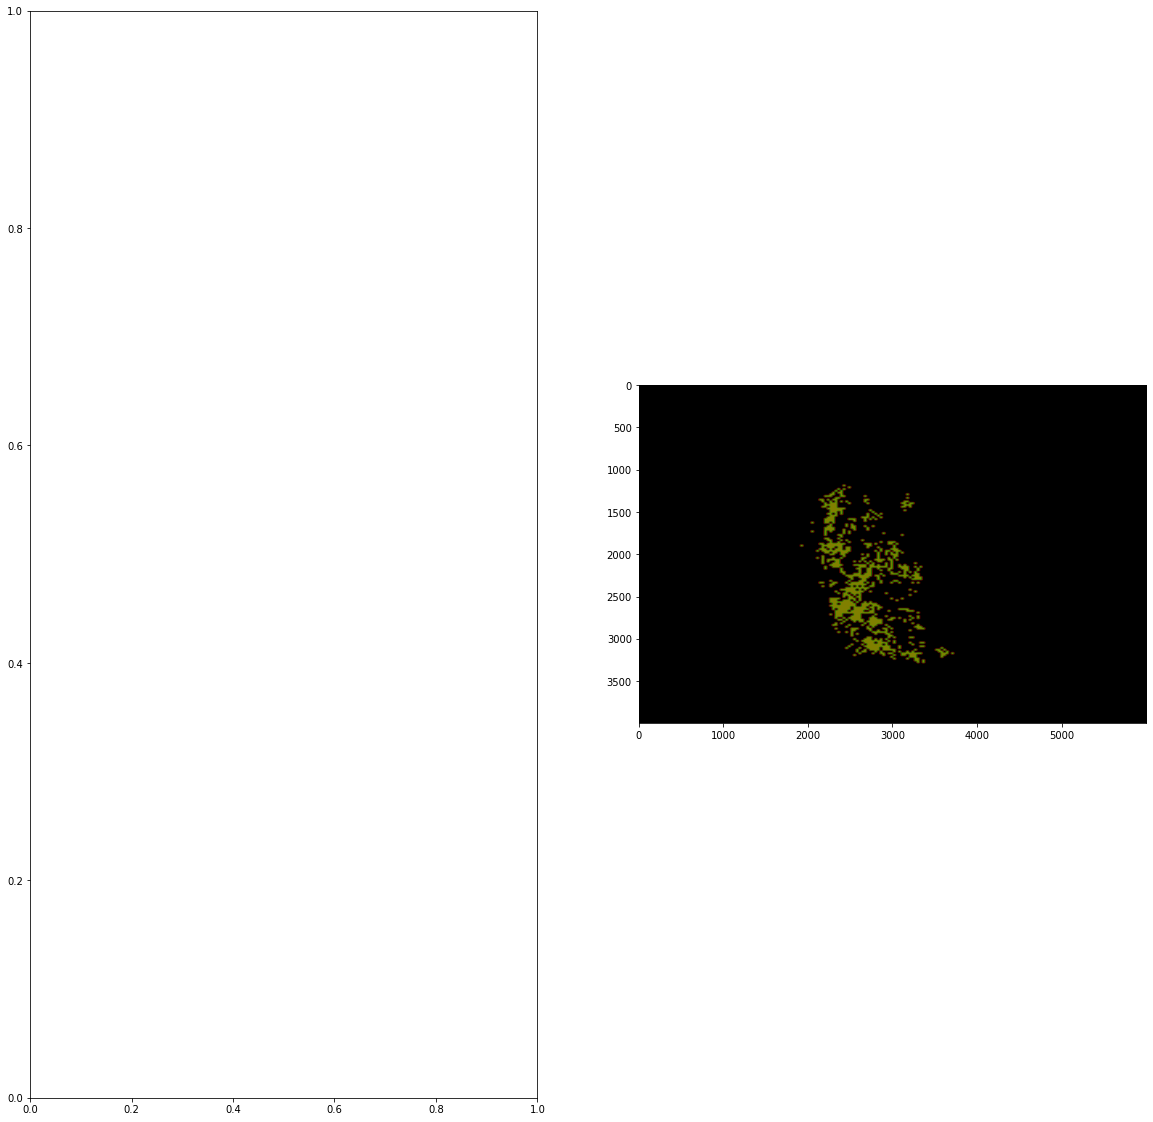

In [22]:
output_img = Image.fromarray(output_arr.astype('uint8'), mode='L')
output_img = output_img.resize(original_size, Image.BICUBIC)
output_img.putpalette(palette)
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[1].imshow(output_img)

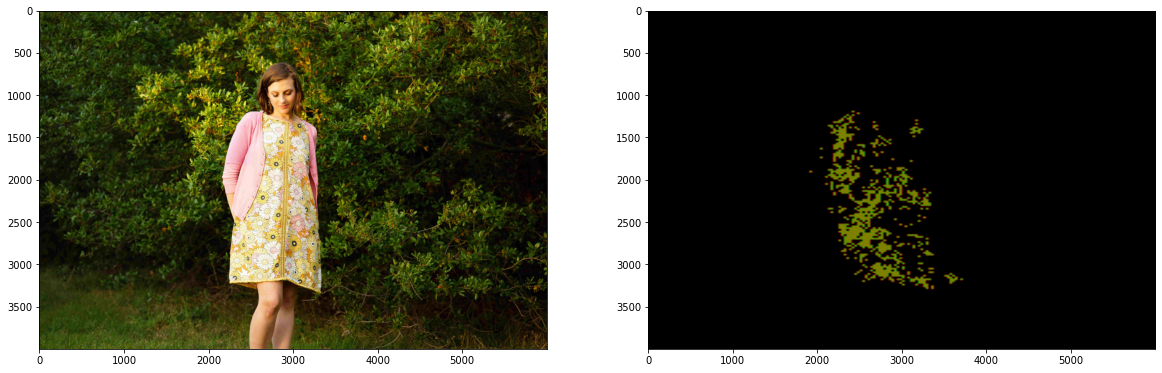

In [16]:
tottime = 0
images = list(Path("../../images/train").glob("*"))
N = 8
image = Image.open(images[N]).convert("RGB")
original_image = image
original_size = image.size
image = image.resize((768, 768), Image.BICUBIC)
x = img_transform(image).unsqueeze(0).to(device)
with torch.no_grad():
    start = time()
    output = model(x)
    end = time()
    tottime += end - start
    # output - batch, classes, h, w
    output = output.squeeze(0).argmax(0)

output_arr = output.cpu().numpy()
output_img = Image.fromarray(output_arr.astype('uint8'), mode='L')
output_img = output_img.resize(original_size, Image.BICUBIC)
output_img.putpalette(palette)
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(original_image)
axs[1].imshow(output_img)


In [7]:
axs[1]

<AxesSubplot:>

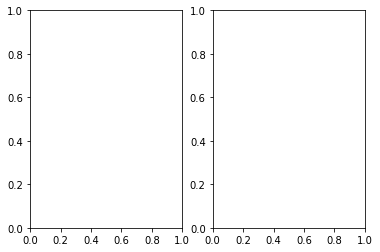

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)